Given a generic psi and the expected encoded state of 3 qubits (bit flip or phase flip). This code will train a q table based on psi tensored with varied pairs of 0 and 1 as ancilla qubits. (they build off eachother/use the previous q values)

In [1]:
from numpy import *
import cmath
from random import randrange
import pandas as pd
import time
from IPython.display import clear_output
import scipy
import matplotlib.pyplot as plt

In [2]:
one = array([[int(0) + 0j], [int(1) + 0j]])
zero = array([[int(1) + 0j], [int(0) + 0j]])
plus = (1/sqrt(2))*(zero + one)
minus = (1/sqrt(2))*(zero - one)

theta = pi/3
a = cos(theta)
b = sin(theta)
psi = a*zero + b*one

In [3]:
def norm(state):
    prod = scipy.sqrt(transpose(state.conjugate()).dot(state))
    return(asscalar(prod))

In [4]:
def fidelityp(guess, right):
    mult = (transpose(guess.conjugate())).dot(right)*(transpose(right.conjugate())).dot(guess)
    #print(mult)
    root = asscalar((mult))
    return(abs(root))

In [5]:
H = (1/sqrt(2))*array([[1,1],[1, -1]])
I = array([[1 , 0], [0, 1]])
T = array([[1, 0], [0, exp((1j*pi)/4)]])
S = array([[1, 0], [0, 1j]])

In [6]:
X = array([[0 , 1], [1,0]])
X1 = kron(kron(X, I),I)
X2 = kron(kron(I,X),I)
X3 = kron(kron(I,I),X)

Y = array([[0 , -1j], [1j,0]])
Y1 = kron(kron(Y, I),I)
Y2 = kron(kron(I,Y),I)
Y3 = kron(kron(I,I),Y)

Z = array([[1 , 0], [0,-1]])
Z1 = kron(kron(Z, I),I)
Z2 = kron(kron(I,Z),I)
Z3 = kron(kron(I,I),Z)

In [7]:
zerop = zero*transpose(zero)
onep = one*transpose(one)


In [8]:
CNOT13 = kron(kron(zerop,I),I) + kron(kron(onep,I),X)
CNOT31 = kron(kron(I,I),zerop) + kron(kron(X,I),onep)
CNOT21 = kron(kron(I,zerop),I) + kron(kron(X,onep),I)
CNOT23 = kron(kron(I,zerop),I) + kron(kron(I,onep),X)
CNOT32 = kron(kron(I,I),zerop) + kron(kron(I,X),onep)
CNOT12 = kron(kron(zerop,I),I) + kron(kron(onep,X),I)
H1 = kron(kron(H, I), I)
H2 = kron(kron(I, H), I)
H3 = kron(kron(I, I), H)
T1 = kron(kron(T, I), I)
T2 = kron(kron(I, T), I)
T3 = kron(kron(I, I), T)
S1 = kron(kron(S, I), I)
S2 = kron(kron(I, S), I)
S3 = kron(kron(I, I), S)
I3 = kron(kron(I,I),I)


In [9]:
glist = [I3, CNOT12, CNOT21, CNOT13, CNOT31, CNOT23, CNOT32, H1, H2, H3, T1, T2, T3, S1, S2, S3]

In [10]:
zero3 = kron(kron(zero,zero),zero)
zzo = kron(kron(zero,zero),one)
zoz = kron(kron(zero,one),zero)
zoo = kron(kron(zero,one),one)
ozz = kron(kron(one,zero),zero)
ozo = kron(kron(one,zero),one)
ooz = kron(kron(one,one),zero)
one3 = kron(kron(one,one),one)

slist = [zero3, zzo, zoz, zoo, ozz, ozo, ooz, one3]


In [11]:
psi1 = kron(kron(psi,zero),zero)
psi2 = kron(kron(psi,zero),one)
psi3 = kron(kron(psi,one),zero)
psi4 = kron(kron(psi,one),one)

psilist = [psi1,psi2,psi3,psi4]

In [12]:
Q_table = pd.DataFrame()
for m in range(0,len(glist)):
    gate = m
    new = (glist[m].dot(psi1))
    Q = pd.DataFrame({'state' : str(psi1), 'gate':gate, 'new': str(new), 'Q':0, 'fidelity':0}, index=[0])
    Q_table = Q_table.append(Q)
Q_table = Q_table.reset_index(drop=True)

In [13]:
pd.set_option('display.max_colwidth', 100)
Q_table

,state,gate,new,Q,fidelity
0,[[0.5 +0.j]\n [0. +0.j]\n [0. +0.j]\n [0. +0.j]\n [0.8660254+0.j]\n [0. ...,0,[[0.5 +0.j]\n [0. +0.j]\n [0. +0.j]\n [0. +0.j]\n [0.8660254+0.j]\n [0. ...,0,0
1,[[0.5 +0.j]\n [0. +0.j]\n [0. +0.j]\n [0. +0.j]\n [0.8660254+0.j]\n [0. ...,1,[[0.5 +0.j]\n [0. +0.j]\n [0. +0.j]\n [0. +0.j]\n [0. +0.j]\n [0. ...,0,0
2,[[0.5 +0.j]\n [0. +0.j]\n [0. +0.j]\n [0. +0.j]\n [0.8660254+0.j]\n [0. ...,2,[[0.5 +0.j]\n [0. +0.j]\n [0. +0.j]\n [0. +0.j]\n [0.8660254+0.j]\n [0. ...,0,0
3,[[0.5 +0.j]\n [0. +0.j]\n [0. +0.j]\n [0. +0.j]\n [0.8660254+0.j]\n [0. ...,3,[[0.5 +0.j]\n [0. +0.j]\n [0. +0.j]\n [0. +0.j]\n [0. +0.j]\n [0.86...,0,0
4,[[0.5 +0.j]\n [0. +0.j]\n [0. +0.j]\n [0. +0.j]\n [0.8660254+0.j]\n [0. ...,4,[[0.5 +0.j]\n [0. +0.j]\n [0. +0.j]\n [0. +0.j]\n [0.8660254+0.j]\n [0. ...,0,0
5,[[0.5 +0.j]\n [0. +0.j]\n [0. +0.j]\n [0. +0.j]\n [0.8660254+0.j]\n [0. ...,5,[[0.5 +0.j]\n [0. +0.j]\n [0. +0.j]\n [0. +0.j]\n [0.8660254+0.j]\n [0. ...,0,0
6,[[0.5 +0.j]\n [0. +0.j]\n [0. +0.j]\n [0. +0.j]\n [0.8660254+0.j]\n [0. ...,6,[[0.5 +0.j]\n [0. +0.j]\n [0. +0.j]\n [0. +0.j]\n [0.8660254+0.j]\n [0. ...,0,0
7,[[0.5 +0.j]\n [0. +0.j]\n [0. +0.j]\n [0. +0.j]\n [0.8660254+0.j]\n [0. ...,7,[[ 0.96592583+0.j]\n [ 0. +0.j]\n [ 0. +0.j]\n [ 0. +0.j]\n [-0.25881905+0....,0,0
8,[[0.5 +0.j]\n [0. +0.j]\n [0. +0.j]\n [0. +0.j]\n [0.8660254+0.j]\n [0. ...,8,[[0.35355339+0.j]\n [0. +0.j]\n [0.35355339+0.j]\n [0. +0.j]\n [0.61237244+0.j]\n ...,0,0
9,[[0.5 +0.j]\n [0. +0.j]\n [0. +0.j]\n [0. +0.j]\n [0.8660254+0.j]\n [0. ...,9,[[0.35355339+0.j]\n [0.35355339+0.j]\n [0. +0.j]\n [0. +0.j]\n [0.61237244+0.j]\n ...,0,0


In [53]:
alpha = 0.5 #how much we update Q for every new action
gamma = 0.9 #discount factor 

num_iter = 1 #how many agents will come up with their own Q values from scratch
num_repeats = 200 #How many events one agent will go through to obtain Q values
penalty = 0.1 #How much taken off reward for each step
steps = 10 #How many steps in an event

In [49]:


right = H3.dot(H2.dot(H1.dot(CNOT12.dot(CNOT13.dot(psi1)))))
right

array([[ 0.48296291+0.j],
       [-0.12940952+0.j],
       [-0.12940952+0.j],
       [ 0.48296291+0.j],
       [-0.12940952+0.j],
       [ 0.48296291+0.j],
       [ 0.48296291+0.j],
       [-0.12940952+0.j]])

In [16]:
fidelityp(right,psi1)

0.01674682452694519

In [56]:
#table = Q_table.copy()
maxfidel = 0
#fidelarray = []
final = pd.DataFrame() #Dataframe to store state action pairs for top Q values for each agent
 #Dataframe to store all Q values of all agents 
for iter in range(0,1):
    #tots1 = pd.DataFrame()#Begin an agent
    #table = together.copy() #set the starting dataframe (empty Q values or precalculated)
    print(str(iter) + ' has begun')
    state1 = psilist[iter]
    print(state1)
    for repeats in range(0,num_repeats):
        psinit = state1.copy()
        psiold = psinit.copy() #save the current state
        reward = 0 #Reset the reward
        for t in range(0,steps): #begin a step
            reward += penalty #add more penalty with each step
        
            sec = table[table['state']==str(psiold)] #choose rows of the original table that contain the current state
            plus = 0 #reset award
            if (fidelityp(psiold, right)) > 0.99999999999:
                plus = 5
            #elif (fidelityp(psiold, right)) > 0.85:
            #    plus = (fidelityp(psiold, right))*(4/(0.15)) + (1 - (fidelityp(psiold, right))*(4/(0.15)))
            else:
                plus = 0 
            
            if (fidelityp(psiold, right)) > maxfidel:
                maxfidel = (fidelityp(psiold, right))
                
            
            
            if len(sec) == 0: #if the new state is not in the dataframe, insert it with all the possible actions
                for s in range(0,len(glist)):
                    lad = glist[s].dot(psiold)
                    sec = pd.DataFrame({'state' : str(psiold), 'gate':s, 'new':str(lad), 'Q':0, 'fidelity':0}, index=[0])
                    table = table.append(sec)
        
            gather = pd.DataFrame() #dataframe to collect all possible new states 
            for n in range(0,(len(sec))): #iterate through the rows that contain the current state
                for z in range(0,len(glist)): # find the action associated with the state in each row
                    if(sec.iloc[n]['gate']== z):
                        apply = array(glist[z])
                        zed = z
                    
                psinew = apply.dot(psiold) #create new state by applying action
                
                
                news = table[table['state']==str(psinew)] #choose part of dataframe that contains the new state
            
                if len(news) == 0: #if the new state is not in the dataframe, insert it with all the possible actions
                    for s in range(0,len(glist)):
                        lad = glist[s].dot(psinew)
                        news = pd.DataFrame({'state' : str(psinew), 'gate':s, 'new':str(lad), 'Q':0, 'fidelity':0}, index=[0])
                        table = table.append(news)
                    
                maxQ = max(news['Q']) #find the max Q value the new state
                gather = gather.append(news).drop_duplicates() #create a dataframe of all possible new states
                   
                table.loc[(table.state == str(psiold)) & (table.gate == zed), 'Q'] += alpha*((plus - reward) + gamma*(maxQ) - sec.iloc[n]['Q'])
                table.loc[(table.state == str(psiold)) & (table.gate == zed), 'fidelity'] = (fidelityp(psiold, right))
                #update the Q value of the old state based on the rewards given by the new state
            if plus == 5: #If we have reached the state we want we can stop
                print('goal reached')
                print(psiold)
                break
            else:
                sec = table[table['state']==str(psiold)]
                top = sec.loc[(sec.Q == max(sec['Q']))] #collect the max Q value from all possible new states
                maxi = top.iloc[0]['Q']
                q = randrange(100)
                if (q > 70) and (maxi != 0): #Create a percentage chance that the next state will be one with a max Q value (expoitation) or a state obtained from a random action (exploration)
                    toparray =[] #sort these into an array with their associated action
                    actarray =[]
                    for o in range(0,len(top)):
                        p = top.iloc[o]['gate']
                        actarray.append(p)
                        toparray.append((array(glist[p])).dot(psiold))
                    r = randrange(len(toparray))
                    psiold = toparray[r]
                    action = actarray[r]
                    
                    
                    
                else:
                    garray =[] #create an array of all possible new states and a corresponding array with associated actions
                    actg = []
                    for a in range(0,len(sec)):
                        b = sec.iloc[a]['gate']
                        actg.append(b)
                        garray.append((array(glist[b])).dot(psiold))
                    r = randrange(len(garray))
                    psiold = garray[r]
                    action = actg[r]
                    
        
            #print(str(t) + 'th state is ' + str(psiold) + ' after action ' + str(action))
        print(repeats) 
        fidelarray.append(maxfidel)
    
    #tots1 = tots1.append(table) #add the updated Q values from this agent to a table
    oppa = table.loc[(table.state == str(state1))] #select the rows with the initial state
    lol = oppa.sort_values("Q", ascending=False) #sort according to Q value
    top = lol.head(1) #Choose the state action pair with the top Q value
    for n in [0, 1, 2, 3, 4, 5, 6]:
        
        oppa1 = table.loc[(table.state == top['new'].values[n])] #Find the state that results from the top action being applied
        lol = oppa1.sort_values("Q", ascending=False) #find the max Q value of next state
        top1 = lol.head(1)
        
        top = top.append(top1) #add it to the dataframe of steps
        #print(top1)
         
    final = final.append(top) #add this agents top first 4 steps to the other agents top first 4 steps
    final = final.reset_index(drop=True)

0 has begun
[[0.5      +0.j]
 [0.       +0.j]
 [0.       +0.j]
 [0.       +0.j]
 [0.8660254+0.j]
 [0.       +0.j]
 [0.       +0.j]
 [0.       +0.j]]
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
2

Change code so that the Q value of the current state is only calculated once before the Q values of next states are looked at

In [65]:
pd.set_option('display.max_colwidth', 100)
reads = final.head(40)
reads

,state,gate,new,Q,fidelity
0,[[0.5 +0.j]\n [0. +0.j]\n [0. +0.j]\n [0. +0.j]\n [0.8660254+0.j]\n [0. ...,9,[[0.35355339+0.j]\n [0.35355339+0.j]\n [0. +0.j]\n [0. +0.j]\n [0.61237244+0.j]\n ...,6.049317,0.016747
1,[[0.35355339+0.j]\n [0.35355339+0.j]\n [0. +0.j]\n [0. +0.j]\n [0.61237244+0.j]\n ...,1,[[0.35355339+0.j]\n [0.35355339+0.j]\n [0. +0.j]\n [0. +0.j]\n [0. +0.j]\n ...,7.342629,0.116627
2,[[0.35355339+0.j]\n [0.35355339+0.j]\n [0. +0.j]\n [0. +0.j]\n [0. +0.j]\n ...,7,[[ 0.25 +0.j]\n [ 0.25 +0.j]\n [ 0.4330127+0.j]\n [ 0.4330127+0.j]\n [ 0.25 +0.j]\n ...,8.611402,0.116627
3,[[ 0.25 +0.j]\n [ 0.25 +0.j]\n [ 0.4330127+0.j]\n [ 0.4330127+0.j]\n [ 0.25 +0.j]\n ...,8,[[ 0.48296291+0.j]\n [ 0.48296291+0.j]\n [-0.12940952+0.j]\n [-0.12940952+0.j]\n [-0.12940952+0....,10.103497,0.031250
4,[[ 0.48296291+0.j]\n [ 0.48296291+0.j]\n [-0.12940952+0.j]\n [-0.12940952+0.j]\n [-0.12940952+0....,4,[[ 0.48296291+0.j]\n [-0.12940952+0.j]\n [-0.12940952+0.j]\n [ 0.48296291+0.j]\n [-0.12940952+0....,11.976217,0.062500
5,[[ 0.48296291+0.j]\n [-0.12940952+0.j]\n [-0.12940952+0.j]\n [ 0.48296291+0.j]\n [-0.12940952+0....,0,[[ 0.48296291+0.j]\n [-0.12940952+0.j]\n [-0.12940952+0.j]\n [ 0.48296291+0.j]\n [-0.12940952+0....,14.530986,1.000000
6,[[ 0.48296291+0.j]\n [-0.12940952+0.j]\n [-0.12940952+0.j]\n [ 0.48296291+0.j]\n [-0.12940952+0....,0,[[ 0.48296291+0.j]\n [-0.12940952+0.j]\n [-0.12940952+0.j]\n [ 0.48296291+0.j]\n [-0.12940952+0....,14.530986,1.000000
7,[[ 0.48296291+0.j]\n [-0.12940952+0.j]\n [-0.12940952+0.j]\n [ 0.48296291+0.j]\n [-0.12940952+0....,0,[[ 0.48296291+0.j]\n [-0.12940952+0.j]\n [-0.12940952+0.j]\n [ 0.48296291+0.j]\n [-0.12940952+0....,14.530986,1.000000


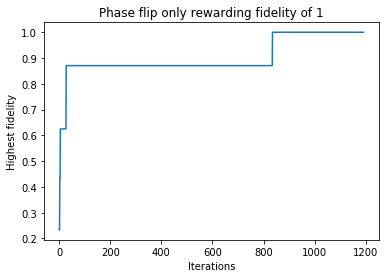

In [66]:
plt.plot(fidelarray)
plt.ylabel('Highest fidelity')
plt.xlabel('Iterations')
plt.title('Phase flip only rewarding fidelity of 1')
plt.show()

In [61]:
del fidelarray[599:606]

In [62]:
fidelarray[599:606]

[0.8705127018922189,
 0.8705127018922189,
 0.8705127018922189,
 0.8705127018922189,
 0.8705127018922189,
 0.8705127018922189,
 0.8705127018922189]

In [20]:
ask = psi1
table = table.copy()
final = pd.DataFrame() #Dataframe to store state action pairs for top Q values for each agent
tots1 = pd.DataFrame() 
oppa = table.loc[(table.state == str(ask))] #select the rows with the initial state
lol = oppa.sort_values("Q", ascending=False) #sort according to Q value
top = lol.head(1) #Choose the state action pair with the top Q value
for n in [0, 1, 2, 3, 4, 5, 6, 7, 8]:
        
    oppa1 = table.loc[(table.state == top['new'].values[n])] #Find the state that results from the top action being applied
    lol = oppa1.sort_values("Q", ascending=False) #find the max Q value of next state
    top1 = lol.head(1)
        
    top = top.append(top1) #add it to the dataframe of steps
    if (top.iloc[(n+1)]['new'] == top.iloc[(n+1)]['state']):
        break
        
top = top.reset_index(drop=True)

reads = top.head(30)

first = reads.iloc[0]['state']
last = reads.iloc[(len(reads) -1)]['state']
print('to get from ')
print(first)
print(' to ')
print(last)
print(' use actions: ')
for ii in range(0,len(reads)):
    act = reads.iloc[ii]['gate']
    print(str(act))
reads

to get from 
[[0.5      +0.j]
 [0.       +0.j]
 [0.       +0.j]
 [0.       +0.j]
 [0.8660254+0.j]
 [0.       +0.j]
 [0.       +0.j]
 [0.       +0.j]]
 to 
[[ 0.6830127+0.j]
 [ 0.       +0.j]
 [-0.1830127+0.j]
 [ 0.       +0.j]
 [ 0.       +0.j]
 [-0.1830127+0.j]
 [ 0.       +0.j]
 [ 0.6830127+0.j]]
 use actions: 
1
7
3
8
0


,state,gate,new,Q,fidelity
0,[[0.5 +0.j]\n [0. +0.j]\n [0. +0.j]\n [0. +0.j]\n [0.8660254+0.j]\n [0. ...,1,[[0.5 +0.j]\n [0. +0.j]\n [0. +0.j]\n [0. +0.j]\n [0. +0.j]\n [0. ...,-0.912124,0.016747
1,[[0.5 +0.j]\n [0. +0.j]\n [0. +0.j]\n [0. +0.j]\n [0. +0.j]\n [0. ...,7,[[ 0.35355339+0.j]\n [ 0. +0.j]\n [ 0.61237244+0.j]\n [ 0. +0.j]\n [ 0.35355339+0....,-0.858122,0.435256
2,[[ 0.35355339+0.j]\n [ 0. +0.j]\n [ 0.61237244+0.j]\n [ 0. +0.j]\n [ 0.35355339+0....,3,[[ 0.35355339+0.j]\n [ 0. +0.j]\n [ 0.61237244+0.j]\n [ 0. +0.j]\n [ 0. +0....,-0.650315,0.062500
3,[[ 0.35355339+0.j]\n [ 0. +0.j]\n [ 0.61237244+0.j]\n [ 0. +0.j]\n [ 0. +0....,8,[[ 0.6830127+0.j]\n [ 0. +0.j]\n [-0.1830127+0.j]\n [ 0. +0.j]\n [ 0. +0.j]\n ...,-0.325000,0.116627
4,[[ 0.6830127+0.j]\n [ 0. +0.j]\n [-0.1830127+0.j]\n [ 0. +0.j]\n [ 0. +0.j]\n ...,0,[[ 0.6830127+0.j]\n [ 0. +0.j]\n [-0.1830127+0.j]\n [ 0. +0.j]\n [ 0. +0.j]\n ...,-0.250000,0.031250
